In [ ]:
import datetime
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [ ]:
#Function to get historical stock data
def get_stock_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date)
    return data

In [ ]:
#Function to prepare and and process the data
def prepare_data(stock_data, future_days):
    stock_data = stock_data[['Close']]
    stock_data['Prediction'] = stock_data[['Close']].shift(-future_days)
    X = np.array(stock_data.drop(['Prediction'], 1))[:-future_days]
    Y = np.array(stock_data['Prediction'])[:-future_days]
    return X, Y

In [ ]:
#Function to Split the data into train and test data
def split_data(X, Y, test_size=0.20):
    return train_test_split(X, Y, test_size=test_size)

In [ ]:
#Function to train different models
def train_linear_regression(X_train, Y_train):
    return LinearRegression().fit(X_train, Y_train)

In [ ]:
#Function to predict Future Price
def predict_future_prices(model, X_future):
    return model.predict(X_future)

In [ ]:
#Function to calculate the accuracy
def calculate_accuracy(model, X_test, Y_test):
    predictions = model.predict(X_test)
    accuracy = r2_score(Y_test, predictions)
    return accuracy

In [ ]:
#Function for plotting graph
def visualize_predictions(stock_data, valid_data, predictions, model_name):
    plt.title(f'Stock Price Prediction using {model_name}')
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.plot(stock_data['Close'], color='teal', lw=3)
    plt.plot(valid_data['Close'], color='red', lw=3)
    plt.plot(valid_data[f'{predictions}'], color='orange', lw=2)
    plt.legend(['Trained', 'Actual', 'Predicted'])
    plt.show()
    print()

Choose a stock:
1. TATASTEEL.NS
2. RELIANCE.NS
3. VEDL.NS
4. ONGC.NS
Enter the number corresponding to the stock: 1
TATASTEEL.NS
[*********************100%%**********************]  1 of 1 completed
Accuracy: 0.8232200582449142


<ipython-input-62-bd6928bfe413>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Prediction'] = stock_data[['Close']].shift(-future_days)
<ipython-input-62-bd6928bfe413>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock_data.drop(['Prediction'], 1))[:-future_days]
<ipython-input-71-d58f2fb97ac8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Prediction'] = stock_data[['Close']

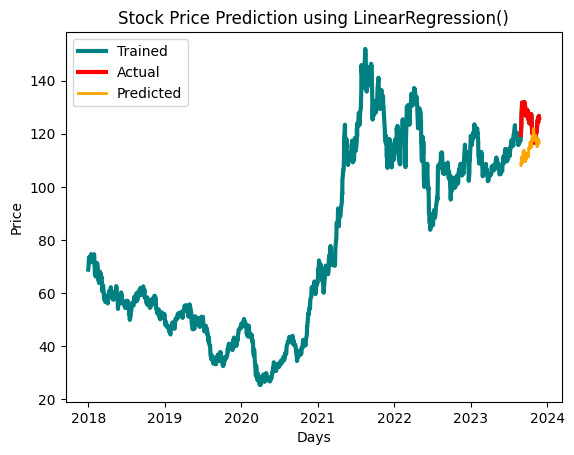

In [ ]:
def main():
    # Define stock symbols and time range
    symbols = ['TATASTEEL.NS', 'RELIANCE.NS', 'VEDL.NS', 'ONGC.NS']
    start_date = "2018-01-01"
    predict_start = datetime.date.today()

    # Let the user choose a stock
    print("Choose a stock:")
    for i, symbol in enumerate(symbols, 1):
        print(f"{i}. {symbol}")

    selected_stock_index = int(input("Enter the number corresponding to the stock: ")) - 1
    selected_stock = symbols[selected_stock_index]
    print(selected_stock)

    # Fetch historical data
    stock_data = get_stock_data(selected_stock, start_date, predict_start)
    future_days = 60
    X, Y = prepare_data(stock_data, future_days)

    X_train, X_test, Y_train, Y_test = split_data(X, Y, test_size=0.20)

    # Train models
    lr_model = train_linear_regression(X_train, Y_train)

    # Calculate accuracy
    accuracy = calculate_accuracy(lr_model, X_test, Y_test)

    print(f'Accuracy: {accuracy}')

    # Predict future prices
    stock_data = stock_data[['Close']]
    stock_data['Prediction'] = stock_data[['Close']].shift(-future_days)
    X_future_days = stock_data.drop(['Prediction'], 1)[:-future_days]

    X_future_days = X_future_days.tail(future_days)
    X_future_days = np.array(X_future_days)
    lr_predictions = predict_future_prices(lr_model, X_future_days)


    # Visualize predictions
    valid_data = stock_data[X.shape[0]:]

    valid_data['Linear Regression'] = lr_predictions
    visualize_predictions(stock_data, valid_data, 'Linear Regression', lr_model)

main()